In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from scipy.signal import fftconvolve
import IPython
import pyroomacoustics as pra
from pyroomacoustics import utilities
from pyroomacoustics.parameters import constants

In [2]:
def rad2freq(rad, fs):
    return rad * (fs/2) / np.pi

def freq2rad(freq,fs):
    return freq*2*np.pi/fs

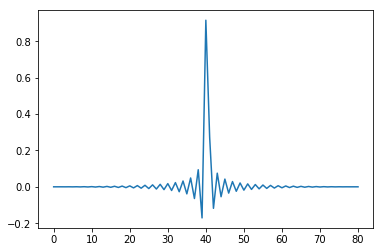

In [3]:
window= utilities.fractional_delay(0.23)
plt.plot(window)

In [4]:
fs = 88200

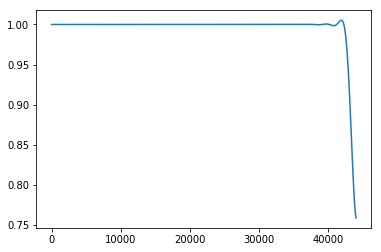

In [5]:
w,h = signal.freqz(window,1)
plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % 5)

In [6]:
fs = 88200
a = [1,1,1,1,1,1]
f = [125,250,500,1000,2000,4000]
ranges = [[fr*3/4,fr*6/4] for fr in f]
ranges[0][0] = 1
ranges[5][1] = fs/2-1000
taps= np.zeros((6,81))
for i in range(6):
    taps[i] = (a[i]*signal.firwin(numtaps=81,
                       cutoff=ranges[i],
                       fs=fs,
                       pass_zero=False, 
                       window='hann',
                       scale=False))

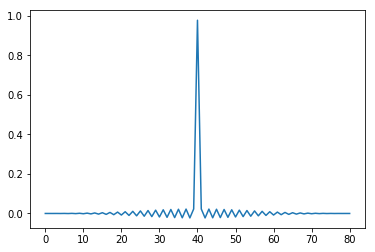

In [7]:
tapsSum = np.sum(taps, axis=0)
plt.plot(tapsSum)

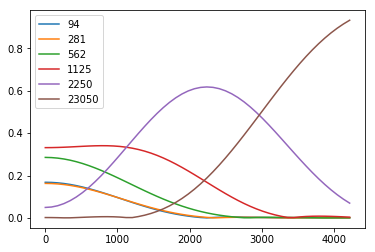

In [8]:
plt.figure()
for i in range(6):
    w,h = signal.freqz(taps[i],1)
    x = (fs * 0.5 / np.pi) * w
    y = abs(h)
    center_freq = np.mean(ranges[i])
    plt.plot(x[:50], y[:50], label="%d" % center_freq)
    #plt.axvline(x=center_freq)
plt.legend()

w, h = signal.freqz(window)
plt.semilogx([rad2freq(rad, fs) for rad in w], 20 * np.log10(abs(h)))

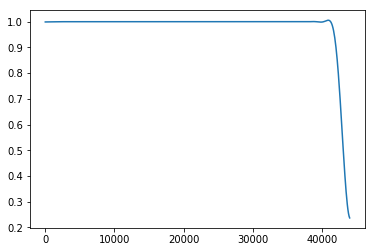

In [9]:
w,h = signal.freqz(tapsSum,1)
x = (fs * 0.5 / np.pi) * w
y = abs(h)
plt.plot(x, y)

window = signal.firwin2(numtaps=81,
                       freq=[0.4, 0.5, 1.0],
                       gain= [0.5, 1.0, 0.0],
                       fs=fs,
                       antisymmetric = True)
plt.plot(window)

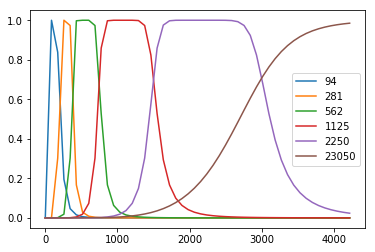

In [10]:
ranges2 = ranges
ranges2[0][0] = 1
ranges2[5][1] = fs/2-1000
rangesW = [[(f[0])*2/fs,(f[1])*2/fs] for f in ranges2]
order = 5
htot=np.zeros(512)
for i in range(6):
    sos = signal.butter(5,
                        rangesW[i],
                        btype='band', output = 'sos')
    w, h = signal.sosfreqz(sos)
    x = (fs*0.5/np.pi) * w
    y = abs(h)
    center_freq = np.mean(ranges2[i])
    plt.plot(x[:50], y[:50], label="%d" % center_freq)
    #plt.axvline(x=center_freq)
    htot += abs(h)
plt.legend()

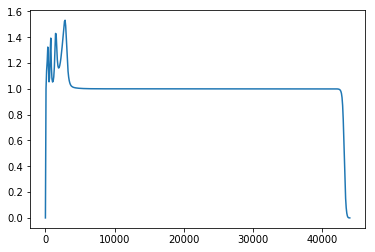

In [11]:
x = (fs*0.5/np.pi) * w
y = abs(htot)
center_freq = np.mean(ranges[i])
plt.plot(x, y, label="%d" % center_freq)
plt.show()

ir[time_ip-fdl2:time_ip+fdl2+1] += alpha[f,i]                        \
                            * np.cos(2*np.pi*constants.get('freq_table_frequencies')[f]*time_ip) \
                            *fractional_delay(time_fp)